In [1]:
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from simon import SimonCipher
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
import string

2023-06-09 20:46:35.520476: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
model=load_model('model2.h5')

2023-06-09 20:46:37.789772: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-06-09 20:46:37.790422: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-06-09 20:46:37.824526: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-09 20:46:37.824680: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce MX330 computeCapability: 6.1
coreClock: 1.594GHz coreCount: 3 deviceMemorySize: 1.95GiB deviceMemoryBandwidth: 52.21GiB/s
2023-06-09 20:46:37.824702: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-06-09 20:46:37.849364: I tensorflow/stream_executor/platform/default

In [3]:
def convert_string_to_64_bit_binary(string):
    # Encode the string using UTF-8
    encoded_string = string.encode('utf-8')
    
    # Convert each byte to its binary representation
    binary_list = [format(byte, '08b') for byte in encoded_string]
    
    # Extend the list to have a total of 64 bits
    binary_list.extend(['00000000'] * (8 - len(binary_list)))
    
    # Join the binary strings and return the result
    binary_representation = ''.join(binary_list)
    return binary_representation

In [4]:
plaintext = random.randint(0, (1 << 32) - 1)
key = ''.join(random.choice(list('0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz@?')) for _ in range(8))
key_bits = convert_string_to_64_bit_binary(key)
key_int = int(key_bits)
cipher = SimonCipher(key_int, key_size=64, block_size=32)
ciphertext = cipher.encrypt(plaintext)


In [5]:
key

'?GDpL@u3'

In [6]:
key_bits

'0011111101000111010001000111000001001100010000000111010100110011'

In [7]:
len(key_bits)

64

In [8]:
plaintexts = []
ciphertexts = []
keys = []


plaintext_bits = np.array(list(format(plaintext, '032b')), dtype=int)
ciphertext_bits = np.array(list(format(ciphertext, '032b')), dtype=int)
key_bit = np.array([int(key_bit) for key_bit in key_bits])
plaintexts.append(plaintext_bits)
ciphertexts.append(ciphertext_bits)
keys.append(key_bit)

    # Convert the lists to NumPy arrays
plaintexts = np.array(plaintexts)
ciphertexts = np.array(ciphertexts)
keys = np.array(keys)

In [9]:
p_keys = model.predict(np.concatenate((plaintexts,ciphertexts),axis=1))


2023-06-09 20:46:38.980260: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-06-09 20:46:38.983273: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1497600000 Hz
2023-06-09 20:46:39.049290: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


In [10]:
p_keys =np.where(p_keys < 0.5, 0, 1)

In [11]:
p_keys

array([[0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
        1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0]])

In [12]:
keys

array([[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1]])

In [13]:
key_r = keys.reshape(8,8)

In [14]:
key_r

array([[0, 0, 1, 1, 1, 1, 1, 1],
       [0, 1, 0, 0, 0, 1, 1, 1],
       [0, 1, 0, 0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 1, 0, 1],
       [0, 0, 1, 1, 0, 0, 1, 1]])

In [15]:
p_keys_r = p_keys.reshape(8,8)

In [16]:
p_keys_r

array([[0, 1, 0, 1, 0, 0, 1, 0],
       [0, 1, 1, 0, 1, 1, 1, 0],
       [0, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 1, 1, 1, 1, 0, 1],
       [0, 1, 0, 1, 1, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 1, 0]])

In [17]:
bap =np.mean(np.logical_not(np.logical_xor(key_r, p_keys_r)), axis=0) 
print("Bit Accuracy Probability (BAP):", bap)

Bit Accuracy Probability (BAP): [1.    0.75  0.125 0.5   0.5   0.5   0.875 0.25 ]


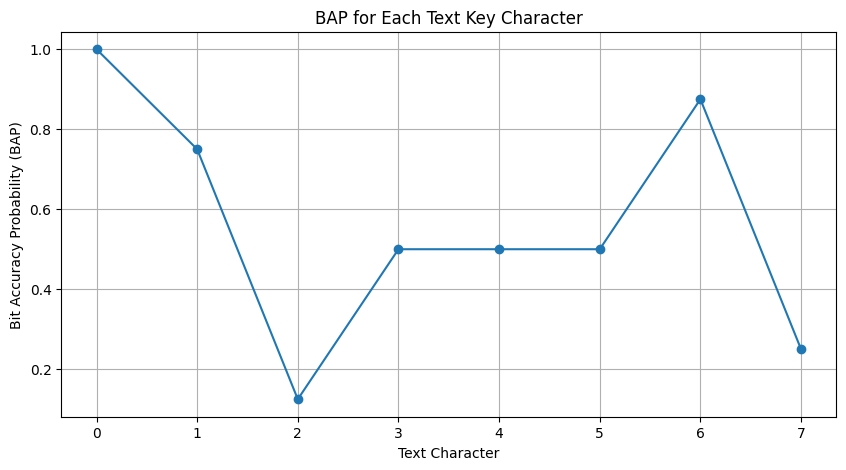

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(range(8), bap, marker='o')
plt.xlabel('Text Character')
plt.ylabel('Bit Accuracy Probability (BAP)')
plt.title('BAP for Each Text Key Character')
plt.grid(True)
plt.show()